In [59]:
# 얼리스탑핑 쉽게
def model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name, patience):
    save_file_name = model_name
    cb_checkpoint,cb_earlystopping = checkpoint_ez(MODEL_SAVE_FOLDER_PATH, save_file_name, patience)
    return cb_checkpoint,cb_earlystopping

def checkpoint_ez(MODEL_SAVE_FOLDER_PATH,save_file_name, patience) : 
    MODEL_SAVE_FOLDER_PATH = MODEL_SAVE_FOLDER_PATH
    data_name = save_file_name
    model_path = MODEL_SAVE_FOLDER_PATH + data_name + '.hdf5'
    # val_loss 값이 낮아졌을(좋아졌을) 때만 저장
    cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss',
                                    verbose=1, save_best_only=True
                                   )
    cb_earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience = patience, verbose=1,
                                                  mode='auto', baseline=None, restore_best_weights=False)
    return cb_checkpoint, cb_earlystopping

# 그래프 쉽게
def loss_graph(label1,label2,bottom,top):
    fig, loss_ax = plt.subplots()
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label=label1)
    loss_ax.plot(history.history['val_loss'], 'r', label=label2)
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    # acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')
    loss_ax.set_ylim(bottom,top)
    return plt.show()

# 모델 저장 def
def json_model_saver(MODEL_SAVE_FOLDER_PATH,file_name):
    # model save by json
    # load model 
    model = keras.models.load_model(MODEL_SAVE_FOLDER_PATH +file_name+ '.hdf5')
    # Save model with json format
    model_json = model.to_json()
    with open(MODEL_SAVE_FOLDER_PATH+file_name+'.json', "w") as json_file:
        json_file.write(model_json)
    # Save weight with h5 format
    model.save_weights( MODEL_SAVE_FOLDER_PATH +file_name +'.h5')
    return print("Saved model to disk : "+ file_name +'.h5')


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = '../9.데이터/ECG/'

In [17]:
data_normal = pd.read_csv(path + 'ptbdb_normal.csv')
data_abnormal = pd.read_csv(path + 'ptbdb_abnormal.csv')

In [18]:
data_normal = np.array(data_normal)
data_abnormal = np.array(data_abnormal)

In [33]:
data_normal = data_normal[:,:data_normal.shape[1]-10]
data_abnormal = data_abnormal[:,:data_abnormal.shape[1]-10]

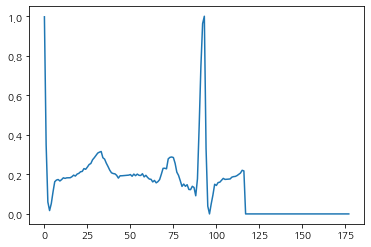

In [36]:
plt.plot(data_normal[40,:])

In [38]:
nTrain = 3000
nTest = 1000
x_train = np.concatenate((data_normal[:nTrain,:], data_abnormal[:nTrain,:]),0)
y_train = np.concatenate((np.zeros(nTrain), np.ones(nTrain)),0)
x_test = np.concatenate((data_normal[nTrain:nTrain+nTest,:], data_abnormal[nTrain:nTrain+nTest,:]),0)
y_test = np.concatenate((np.zeros(nTest), np.ones(nTest)),0)

In [47]:
y_train.shape

(6000,)

In [48]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [51]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [60]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras import layers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 176, 16)           64        
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 174, 16)           784       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 86, 16)            0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 84, 32)            1568      
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 82, 32)            3104      
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 40, 32)            0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32)               

38/38 [==============================] - 0s 8ms/step - loss: 0.0703 - accuracy: 0.9771 - val_loss: 0.1534 - val_accuracy: 0.9458
Epoch 50/50
38/38 [==============================] - 0s 7ms/step - loss: 0.0358 - accuracy: 0.9875 - val_loss: 0.2144 - val_accuracy: 0.9267


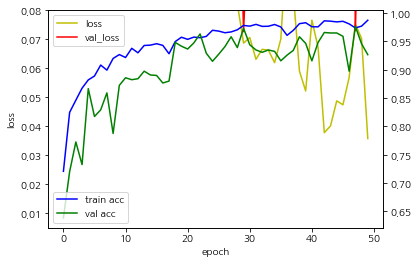

In [62]:
#model_name = 'LSTM'
#cb_checkpoint,cb_earlystopping = model_save_erstp(MODEL_SAVE_FOLDER_PATH, model_name)

model = Sequential()
model.add(layers.Conv1D(filters=16, kernel_size=3, input_shape=(x_train.shape[1],1), activation = 'relu'))
model.add(layers.Conv1D(filters=16, kernel_size=3, activation = 'relu'))
model.add(layers.MaxPooling1D(pool_size = 3, strides=2))
model.add(layers.Conv1D(filters=32, kernel_size=3, input_shape=(x_train.shape[1],1), activation = 'relu'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation = 'relu'))
model.add(layers.MaxPooling1D(pool_size = 3, strides=2))
model.add(layers.Bidirectional(layers.LSTM(16)))
model.add(layers.Dense(units=2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs = 50, batch_size=128, validation_split=0.2)
loss_graph('loss','val_loss',0.005,0.08)

Epoch 1/50
38/38 [==============================] - 1s 28ms/step - loss: 0.6336 - accuracy: 0.6398 - val_loss: 0.7859 - val_accuracy: 0.5667
Epoch 2/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5777 - accuracy: 0.7129 - val_loss: 0.7396 - val_accuracy: 0.5633
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5651 - accuracy: 0.7173 - val_loss: 0.8005 - val_accuracy: 0.4625
Epoch 4/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5567 - accuracy: 0.7250 - val_loss: 0.7391 - val_accuracy: 0.5583
Epoch 5/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5557 - accuracy: 0.7219 - val_loss: 0.8267 - val_accuracy: 0.4883
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5334 - accuracy: 0.7406 - val_loss: 0.7616 - val_accuracy: 0.4333
Epoch 7/50
38/38 [==============================] - 0s 6ms/step - loss: 0.5305 - accuracy: 0.7446 - val_loss: 0.7488 - val_accuracy: 0.5492
Epoch 8/50
38/38 [=